Intelegensia Buatan Kelompok 7
*   Cindy Nadila Putri 122140002
*   Kayla Chika Lathisya 122140009
*   Yohanna Anzelika Sitepu 122140010
*   Freddy Harahap 122140018
*   Faris Pratama 122140021
*   Zulfa Puri Anjani 122140023
*   Yesa Viola 122140133
*   Dwi Arthur Revangga 122140144

# Skinology: Identifikasi Jenis Kulit Wajah dengan Implementasi Convolutional Neural Network


Dataset: https://www.kaggle.com/datasets/shakyadissanayake/oily-dry-and-normal-skin-types-dataset

### Karakteristik Utama
- *Jumlah Gambar*: Lebih dari 1.000 gambar.
- *Klasifikasi*: Tiga kategori (berminyak, kering, normal).
- *Format Gambar*: Tersedia dalam format JPEG.

### Fitur Utama
- Gambar berfokus pada wajah dan area kulit.
- Label terstruktur untuk klasifikasi yang jelas.

### Tantangan Potensial
- Variasi pencahayaan dan kualitas gambar.
- Keterwakilan yang tidak merata di antara kategori kulit.

### Tujuan Analisis
- Mengembangkan model klasifikasi untuk identifikasi tipe kulit.
- Meningkatkan pemahaman tentang hubungan antara kondisi kulit dan rekomendasi perawatan.

Memasukkan Dataset dari Google Drive ke Google Colab

In [ ]:
import gdown
import zipfile
import os
import shutil

# Corrected URL for direct download
file_id = "1Mh5rNdq8ZPAUYvfl3QT468MOwto6BI9j"
url = f"https://drive.google.com/uc?id={file_id}"
output = 'Dataset_Kulit.zip'

# Download the file
gdown.download(url, output, quiet=False)

# Extract the ZIP file if downloaded correctly
try:
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall()
    os.remove(output)  # Remove the ZIP file after extraction
except zipfile.BadZipFile:
    print("Error: The downloaded file is not a valid ZIP file.")

# Source and destination paths
source_dir = '/content/Oily-Dry-Skin-Types'
dest_dir = '/content/'

# Move files and directories from the source directory to the destination
if os.path.exists(source_dir):
    for item in os.listdir(source_dir):
        source_item = os.path.join(source_dir, item)
        dest_item = os.path.join(dest_dir, item)
        shutil.move(source_item, dest_item)

    print("All contents moved successfully!")
else:
    print("Error: Source directory does not exist.")


Downloading...
From (original): https://drive.google.com/uc?id=1Mh5rNdq8ZPAUYvfl3QT468MOwto6BI9j
From (redirected): https://drive.google.com/uc?id=1Mh5rNdq8ZPAUYvfl3QT468MOwto6BI9j&confirm=t&uuid=44aacc0a-8e5a-43bc-913d-98aed8044dbb
To: /content/Dataset_Kulit.zip
100%|██████████| 130M/130M [00:01<00:00, 73.8MB/s]


All contents moved successfully!


Import Segala Library

Jenis Library:
*   Pandas digunakan untuk memproses data dalam bentuk tabel (data frame) yaitu seperti membaca, menulis, dan memodifikasi data dalam berbagai format.
*   Numpy berfungsi untuk melakukan perhitungan atau pengoperasian seperti pada matriks, vektor dan array.
*   OS digunakan untuk berinteraksi dengan sistem operasi, seperti mengelola file dan folder dan mengakses direktori.
*   CV2 atau OpenCV digunakan untuk melakukan pemrosesan gambar/video seperti deteksi objek, pengenalan wajah, manipulasi gambar dan sebagainya.
*   Matplotlib.pyplot digunakan untuk memvisualisasikan data dalam bentuk grafik dan plot.










In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image as PILImage
from io import BytesIO
import ipywidgets as widgets
from IPython.display import display, Image
import matplotlib.pyplot as plt
import gdown

from IPython.display import clear_output
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import requests

# Data Preprocessing Jenis Kulit Wajah

label_index yaitu struktur data dalam Python yang berfungsi untuk menyimpan pasangan kunci nilai, kuncinya yaitu katagori jenis kulit (dry, normal, oily) dengan nilai (0, 1, 2) yang mewakili masing-masing katagori tersebut.

In [ ]:
label_index = {"dry": 0, "normal": 1, "oily": 2}

Karena gambar terdiri dari beberapa pixel, maka pixel akan dibagi sesuai warna agar sistem lebih cepat dalam membacanya. preprocess_image akan menerima dua parameter yaitu img_path sebagai jalur file gambar yang akan diproses dan target_size merupakan ukuran target untuk nilai default (128, 128) yang berarti gambar akan diubah ukurannya menjadi 128x128 px. Lalu gambar akan dibaca dengan menggunakan fungsi cv2.imread dan gambar akan diubah ukurannya menjadi 128x128 px menggunakan fungsi cv2.resize. Selanjutnya, gambar akan diubah menjadi grayscale menggunakan fungsi cv2.cvtColor dengan konverso cv2.COLOR_BGR2GRAY, yang akan membuat gambar berwarna menjadi gambar hitam putih agar nantinya lebih mudah diolah. Lalu gambar dinormalisasi dengan membagi setiap nilai piksel dengan 255.0 sehingga nilainya berada di antara 0 dan 1 yaitu melalui fungsi img / 255.0. Selanjutnya gambar direshape menjadi bentuk vektor dengan fungsi img.reshape.

In [ ]:
def preprocess_image(img_path, target_size=(128, 128)):
    # Baca gambar
    img = cv2.imread(img_path)
    # Ubah ukuran gambar
    img = cv2.resize(img, target_size)
    # Konversi ke grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Normalisasi nilai piksel (0-1)
    img = img / 255.0
    # Reshape gambar menjadi vektor
    img = img.reshape(target_size[0], target_size[1], 1)
    return img

create_df menerima dua parameter yaitu base sebagai direktori utama tempat gambar disimpan, yang setiap subfoldernya menjunjukkan label dan katagori (seperti, folder dry, normal, dan oily) dan target_size merupakan ukuran target gambar setelah diubah ukurannya. Fungsi dd yaitu sebuah dictionary untuk menyimpan daftar gambar yang telah diproses (images) dan labelnya (labels). Dictionary tersebut akan dikonversi menjadi data Frame. fungsi for i in os.listdir(base) yaitu untuk mengulangi setiap folder di dalam direktori base. for j in os.listdir(label) yaitu setiap file j yang merupakan gambar, nantinya akan melakukan pengulangan setiap file di dalam folder label. lalu melakukan print preprocessimg gambar dan masuk ke DataFrame (spreadsheet). Selanjutnya label akan ditambhkan menggunakan fungsi  dd [images]. append(img) dd[labels].append(label_index[i]).

In [ ]:
# Fungsi untuk membuat DataFrame dan melakukan preprocessing gambar
def create_df(base, target_size=(128, 128)):
    dd = {"images": [], "labels": []}
    for i in os.listdir(base):
        label = os.path.join(base, i)
        for j in os.listdir(label):
            img_path = os.path.join(label, j)
            # Preprocessing gambar
            img = preprocess_image(img_path, target_size)
            # Tambahkan gambar dan label yang sesuai
            dd["images"].append(img)
            dd["labels"].append(label_index[i])
    return pd.DataFrame(dd)


Membuat pengelompokan dataframe dari dataset yang berupa gambar-gambar. Fungsi train_df yaitu dataset yang disiapkan untuk melatih mesinnya. Fungsi val_df mengecek keakuratan pada mesin hasil latihan tadi, apabila masih ada kesalahan maka bisa diganti dan melakukan print ulang dan divalidasi kembali. Apabila sudah sesuai, maka lanjut pada fungsi test_df yaitu untuk melakukan testing atau mengukur performa akhir pada mesin.

In [ ]:
# Membuat DataFrame untuk data train, validation, dan test
train_df = create_df("/content/train")
val_df = create_df("/content/valid")
test_df = create_df("/content/test")

# Ketiga fungsi dibawah yaitu untuk melihat berapa banyak jumlah dataset

Dataset train terdapat keterangan bahwa kategori jenis kulit normal ada 1104 gambar, normal ada 1000 gambar, dan oily ada 652 gambar dengan tipe data integer 64 bit.

In [ ]:
train_df['labels'].value_counts()

,count
labels,
1,1104
2,1000
0,652


Dataset validasi terdapat keterangan bahwa kategori jenis kulit normal ada 111 gambar, normal ada 80 gambar, dan oily ada 71 gambar dengan tipe data integer 64 bit.

In [ ]:
val_df['labels'].value_counts()

,count
labels,
1,111
2,80
0,71


Dataset train terdapat keterangan bahwa kategori jenis kulit normal ada 59 gambar, normal ada 40 gambar, dan oily ada 35 gambar dengan tipe data integer 64 bit.



In [ ]:
test_df['labels'].value_counts()

,count
labels,
1,59
2,40
0,35


Untuk membuat visualisasi data ke diagram batang.





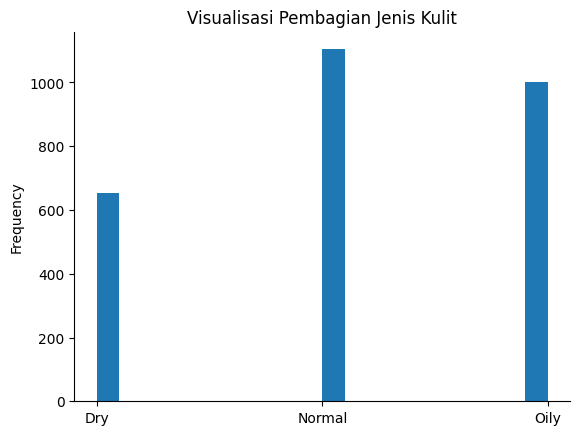

In [ ]:
# @title Visualisasi Pembagian Jenis Kulit

# Create the histogram
train_df['labels'].plot(kind='hist', bins=20, title='Visualisasi Pembagian Jenis Kulit')

# Set x-axis labels
plt.xticks([0, 1, 2], ['Dry', 'Normal', 'Oily'])

# Remove top and right spines for cleaner look
plt.gca().spines[['top', 'right']].set_visible(False)

# Display the plot
plt.show()

untuk membuat visualisasi data ke vektor dan menampilkan 5 teratas.

In [ ]:
# Contoh untuk melihat DataFrame hasil
print(train_df.head())

                                              images  labels
0  [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...       2
1  [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...       2
2  [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...       2
3  [[[0.0], [0.0], [0.0], [0.01568627450980392], ...       2
4  [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...       2


#Data Augmentasi



*   Langkah pertama adalah mengkonfigurasi pengaturan Augmentasi menggunakan **ImageDataGenerator**, menentukan berbagai teknik augmentasi gambar, seperti rotasi, translasi, shear, zoom dan flipping.
*   **ImageDataGenerator** dapat memutar gambar secara acak hingga 20 derajat, menggeser gambar secara horizontal hingga 20 % dari lebar gambar, menggeser gambar secara vertikal hingga 20% dari tinggi gambar, Menerapkan distorsi 'shear' hingga 20%, Memperbesar atau memperkecil gambar hingga 20%, Membalik gambar secara horizontal, Mengisi area kosong yang mungkin muncul setelah dilakukan rotasi atau pergeseran dengan warna pixel terdekat.



In [ ]:
# Augmentation settings for the CNN model
data_gen = ImageDataGenerator(
    rotation_range=20,          # Rotasi gambar sampai 20 derajat
    width_shift_range=0.2,      # Menggeser gambar secara horizontal hingga 20% dari lebar
    height_shift_range=0.2,     # Menggeser gambar secara vertikal hingga 20% dari tinggi gambar
    shear_range=0.2,            # Menerapkan distorsi 'shear' hingga 20%,
    zoom_range=0.2,             # Memperbesar atau memperkecil gambar hingga 20%
    horizontal_flip=True,       # Membalik gambar secara horizontal
    fill_mode='nearest'         # Mengisi area kosong yang mungkin muncul setelah dilakukan rotasi atau pergeseran dengan warna pixel terdekat.
)

Fungsi **augment_images** untuk menghasilkan Augmented Data
Setelah **ImageDataGenerator** diatur, fungsi **augment_images** digunakan untuk menerapkan augmentasi pada dataset.


*   **Looping Melalui Setiap Gambar**

  Fungsi ini iterasi melalui setiap gambar dan label yang ada pada dataset train_df.
*   **Expand Dimensions**

  Setiap gambar diubah bentuknya (reshape) dengan menambahkan dimensi batch (menggunakan np.expand_dims(img, axis=0)). Ini diperlukan karena ImageDataGenerator mengharapkan gambar dengan dimensi (batch, height, width, channels).


*   **Augmentasi Gambar**

  Setiap gambar kemudian dimasukkan ke dalam ImageDataGenerator untuk menghasilkan versi augmentasi.
  Pada contoh ini, lima versi augmentasi dari setiap gambar dihasilkan. Anda dapat menyesuaikan jumlah augmentasi ini sesuai kebutuhan.


*   **Simpan Gambar Augmentasi**

  Setiap gambar yang dihasilkan oleh augmentasi kemudian disimpan dalam list augmented_images, dan label yang sesuai disimpan dalam augmented_labels.






**Menghasilkan Data Augmentasi Akhir**


*    Setelah fungsi augment_images dijalankan, augmented_images dan augmented_labels akan berisi data gambar yang sudah di-augmentasi beserta labelnya.

*   Data ini kemudian dikonversi menjadi array numpy untuk digunakan dalam model CNN atau untuk digabungkan ke dalam DataFrame baru (augmented_df), yang dapat memudahkan pengolahan data selanjutnya.




In [ ]:
# Augment the training images
def augment_images(images, labels, data_gen, batch_size=32):
    augmented_images, augmented_labels = [], []
    for img, label in zip(images, labels):
        img = np.expand_dims(img, axis=0)
        it = data_gen.flow(img, batch_size=1)
        # Generate 5 augmented version of each image
        for _ in range(5):
            augmented_img = next(it)[0].astype('float32')
            augmented_images.append(augmented_img)
            augmented_labels.append(label)
    return np.array(augmented_images), np.array(augmented_labels)


**Menggunakan Data Augmentasi untuk Pelatihan Model CNN**


*   Hasil augmentasi dapat langsung digunakan untuk melatih model CNN, atau Anda bisa menggabungkannya dengan data asli untuk menambah variasi dataset pelatihan
*   Augmentasi ini berguna untuk meningkatkan performa model dengan menambah variasi data dan mengurangi kemungkinan overfitting, karena model akan lebih terbiasa dengan berbagai variasi gambar yang dihasilkan oleh proses augmentasi.




In [ ]:
augment_images_train, augment_labels_train = augment_images(train_df['images'].values, train_df['labels'].values, data_gen)
augment_images_val, augment_labels_val = augment_images(val_df['images'].values, val_df['labels'].values, data_gen)
augment_images_test, augment_labels_test = augment_images(test_df['images'].values, test_df['labels'].values, data_gen)

# Model Arsitektur CNN

Arsitektur Convolutional Neural Network (CNN) untuk klasifikasi multi-kelas dengan fungsi create_cnn_model. Model ini menerima input dengan bentuk gambar (128, 128, 1) (gambar grayscale) dan memiliki tiga kelas keluaran. CNN dibangun secara bertahap menggunakan lapisan-lapisan berikut:

1. **Convolutional Layer**: Lapisan ini mengekstraksi fitur-fitur dari gambar
menggunakan filter berukuran (3x3) dan fungsi aktivasi ReLU. Model dimulai dengan 32 filter di lapisan pertama, 64 di lapisan kedua, dan 128 di lapisan ketiga, masing-masing diikuti oleh operasi MaxPooling untuk mengurangi dimensi data dan menyoroti fitur utama.

2. **Flatten Layer**: Lapisan ini mengubah data yang berbentuk matriks (hasil dari lapisan konvolusi) menjadi vektor 1D agar dapat diproses oleh lapisan fully connected berikutnya.

3. **Fully Connected Layer**: Lapisan dense dengan 128 neuron berfungsi untuk mengintegrasikan fitur yang telah diekstraksi. Dropout sebesar 50% diterapkan untuk mencegah overfitting dengan menonaktifkan sebagian neuron secara acak selama pelatihan.

4. **Output Layer**: Lapisan terakhir dengan jumlah neuron sesuai jumlah kelas (num_classes=3) menggunakan fungsi aktivasi softmax, yang mengonversi keluaran menjadi probabilitas untuk klasifikasi multi-kelas.

Model ini dirancang untuk menganalisis gambar dan menentukan kategori output berdasarkan pola yang dipelajari selama pelatihan.

In [ ]:
# Model Arsitektur
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definisikan arsitektur model CNN
def create_cnn_model(input_shape=(128, 128, 1), num_classes=3):
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the layers
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification

    return model


# Training CNN Model


Menyiapkan model CNN untuk proses pelatihan. Pertama, parameter input_shape (ukuran input gambar) ditentukan sebagai (128, 128, 1) untuk gambar grayscale berukuran 128x128 piksel, dan num_classes ditetapkan sebagai 3 untuk klasifikasi tiga kelas. Kemudian, model CNN dibuat menggunakan fungsi create_cnn_model dengan parameter tersebut. Setelah itu, model dikompilasi menggunakan optimizer **Adam**, yaitu algoritma optimasi adaptif untuk mempercepat dan menstabilkan pelatihan. Fungsi loss yang digunakan adalah **sparse_categorical_crossentropy**, cocok untuk klasifikasi multi-kelas dengan label berupa integer. Metrik **accuracy** ditambahkan untuk memantau performa model selama pelatihan. Setelah kompilasi ini, model siap untuk dilatih menggunakan data yang sesuai.

In [ ]:
# Pelatihan model
input_shape = (128, 128, 1)
num_classes = 3
model = create_cnn_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Melatih model CNN menggunakan data pelatihan (X_train, y_train) dan data validasi (X_val, y_val) yang telah dipersiapkan sebelumnya. Data pelatihan digunakan untuk mengajarkan model mengenali pola, sementara data validasi digunakan untuk mengevaluasi performa model pada setiap epoch. Pelatihan dilakukan dengan fungsi model.fit, yang menjalankan proses selama 10 epoch (iterasi penuh pada data pelatihan) dan memproses data dalam kelompok berukuran 32 gambar setiap batch. Parameter validation_data memungkinkan model untuk diuji secara berkala menggunakan data validasi untuk memantau potensi overfitting. Hasil pelatihan dicatat dalam variabel history, yang menyimpan informasi seperti loss dan akurasi untuk data pelatihan dan validasi pada setiap epoch, sehingga dapat digunakan untuk analisis performa model.

In [ ]:
# Training AI
X_train = augment_images_train
y_train = augment_labels_train

X_val = augment_images_val
y_val = augment_labels_val

history = model.fit(
    X_train, y_train,
    epochs=1 , #harusnya 10
    batch_size=32,
    validation_data=(X_val, y_val)
)

431/431 [==============================] - 316s 733ms/step - loss: 1.0786 - accuracy: 0.3913 - val_loss: 1.0837 - val_accuracy: 0.4237


# Evaluasi CNN Model

Evaluasi performa model yang telah dilatih pada data validasi (X_val, y_val). Fungsi model.evaluate menghitung nilai loss (val_loss) dan akurasi (val_accuracy) model terhadap data validasi, menjelaskan seberapa baik model dapat menggeneralisasi data yang tidak terlihat sebelumnya. Setelah evaluasi selesai, hasil akurasi ditampilkan menggunakan print dalam format desimal dengan dua angka di belakang koma ({val_accuracy:.2f}). Akurasi validasi menunjukkan persentase prediksi model yang benar pada data validasi, yang menjadi indikator utama kualitas model pada tahap generalisasi.

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.2f}")

41/41 [==============================] - 8s 192ms/step - loss: 1.0837 - accuracy: 0.4237
Validation Accuracy: 0.42


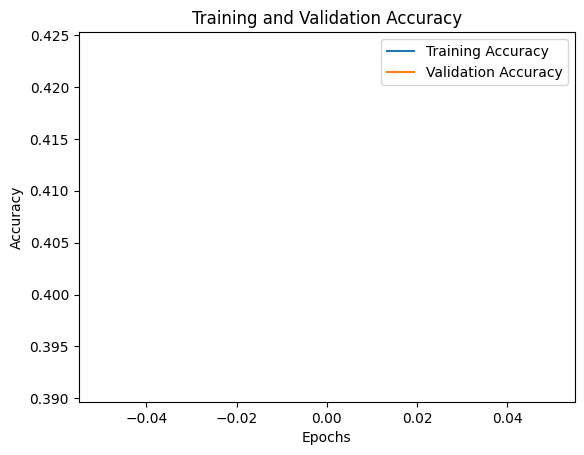

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

Menyimpan bobot model yang telah dilatih ke file model_weights.weights.h menggunakan model.save_weights(). Ini memungkinkan penggunaan ulang model tanpa perlu melatih ulang, dan pesan konfirmasi ditampilkan setelah penyimpanan berhasil.

In [ ]:
# Simpan model
model.save_weights("model_weights.weights.h5")
print("Model telah dilatih dan disimpan sebagai 'model_weights.weights.h5'.")

Model telah dilatih dan disimpan sebagai 'model_weights.weights.h5'.


Bobot model yang telah disimpan sebelumnya dari file "model_weights.weights.h5" dimuat menggunakan metode model.load_weights. Dengan memuat bobot ini, model akan mengembalikan semua parameter (weights dan biases) ke kondisi yang sama seperti saat terakhir kali disimpan, sehingga dapat digunakan langsung untuk evaluasi atau prediksi tanpa perlu pelatihan ulang. Setelah proses pemuatan selesai, pesan konfirmasi ditampilkan melalui fungsi print, memastikan bahwa bobot model berhasil diimpor dari file yang ditentukan. Hal ini berguna untuk melanjutkan pekerjaan pada model di sesi berbeda atau perangkat lain.

In [ ]:
model.load_weights("model_weights.weights.h5")
print("Model berhasil dimuat dari 'model_weights.weights.h5'.")

Model berhasil dimuat dari 'model_weights.weights.h5'.


# Import Dataset Rekomendasi Skincare

Mengunduh dan memuat dataset dari Google Drive ke dalam program. Variabel dataset_url berisi URL yang mengarah ke file di Google Drive. URL ini telah dimodifikasi untuk langsung mengunduh file menggunakan gdown. Kemudian, fungsi gdown.download digunakan untuk mengunduh file CSV dari URL tersebut dan disimpan ke dalam path lokal yang ditentukan oleh variabel dataset_path, yaitu "Dataset_Skincare_Lokal.csv". Setelah file berhasil diunduh, kode selanjutnya menggunakan pandas (pd.read_csv) untuk membaca file CSV dan menyimpannya dalam DataFrame bernama skincare_df, yang memungkinkan untuk memproses dan menganalisis data lebih lanjut.

In [ ]:
dataset_url = "https://drive.google.com/uc?id=17-zjHbt0GlCH5WZI-T4FJnMi8IF368qJ"
dataset_path = "Dataset_Skincare_Lokal.csv"
gdown.download(dataset_url, dataset_path, quiet=False)
skincare_df = pd.read_csv(dataset_path)

Downloading...
From: https://drive.google.com/uc?id=17-zjHbt0GlCH5WZI-T4FJnMi8IF368qJ
To: /content/Dataset_Skincare_Lokal.csv
100%|██████████| 3.72k/3.72k [00:00<00:00, 13.5MB/s]


Membaca file CSV yang berada di path '/content/Dataset_Skincare_Lokal.csv' dan memuatnya ke dalam **DataFrame** pandas yang disimpan dalam variabel skincare_df. Kode ini memungkinkan untuk analisis dan manipulasi data lebih lanjut.

In [ ]:
skincare_df = pd.read_csv('/content/Dataset_Skincare_Lokal.csv')

Menampilkan informasi ringkas tentang DataFrame skincare_df, seperti jumlah baris, kolom, tipe data masing-masing kolom, dan jumlah nilai non-null di setiap kolom.

In [ ]:
skincare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   jenis_kulit         9 non-null      object
 1   face_wash           9 non-null      object
 2   gambar_face_wash    9 non-null      object
 3   moisturizer         9 non-null      object
 4   gambar_moisturizer  9 non-null      object
 5   sunscreen           9 non-null      object
 6   gambar_sunscreen    9 non-null      object
dtypes: object(7)
memory usage: 632.0+ bytes


Menampilkan lima baris pertama dari DataFrame skincare_df, memberikan gambaran umum tentang isi dataset, termasuk nama kolom dan beberapa data awal.

In [ ]:
skincare_df.head()

,jenis_kulit,face_wash,gambar_face_wash,moisturizer,gambar_moisturizer,sunscreen,gambar_sunscreen
0,dry,1. Wardah Nature Daily Aloe Hydramild Facial W...,https://drive.google.com/file/d/13n-eLiu9Ql6w_...,1. Somethinc Supple Power Hyaluronic9+Onsen Mo...,https://drive.google.com/file/d/1MFAe5b0Lvu9FC...,1. Lacoco Daily UV Counter SPF 50 PA++++,https://drive.google.com/file/d/15eIUrE_HcTksZ...
1,dry,2. Venus White Beauty Aqua Facial Wash,https://drive.google.com/file/d/1h6JYlUjIdn_q7...,2. Studio Tropik Rich Skin Barrier Cream,https://drive.google.com/file/d/1VNyS1V1fw6Jm6...,2. Avoskin The Great Shield Sunscreen SPF 50 P...,https://drive.google.com/file/d/1Ur-X3o2dFuDzj...
2,dry,3. Somethinc Low pH Gentle Jelly Cleanser,https://drive.google.com/file/d/1661VEVoDlSQZP...,3. ElsheSkin Deep Hydration Calming Moisturizer,https://drive.google.com/file/d/1EGalce2W1Xsri...,3. Azarine Hydrasoothe Sunscreen Gel SPF 45 PA...,https://drive.google.com/file/d/1m8jqEXLcA7k-s...
3,normal,1. Emina Double Bubble Face Wash,https://drive.google.com/file/d/1qq054PQ3qmhWV...,1. Y.O.U Radiance Up! Deep Moisturizing Cream,https://drive.google.com/file/d/1zpEVGcKwdajEe...,1. Azarine Hydrasoothe Sunscreen Gel SPF 45 PA...,https://drive.google.com/file/d/1ofzQGwvNoZuFp...
4,normal,2. Wardah Lightening Gentle Wash,https://drive.google.com/file/d/1kK9Ni_P95HWCN...,2. Wardah Hydra Rose Dewy Aqua Day Gel,https://drive.google.com/file/d/1k9j4GxaSI7zjV...,2. Avoskin The Great Shield SPF 50 PA++++,https://drive.google.com/file/d/1rN-kCatCk4FS0...


# Data Preprocessing Rekomendasi Skincare Lokal

Konversi link Google Drive yang ada dalam kolom gambar_face_wash, gambar_moisturizer, dan gambar_sunscreen pada DataFrame skincare_df menjadi direct download link. Fungsi convert_drive_link memeriksa apakah link tersebut berasal dari Google Drive, lalu ekstrak file_id untuk membentuk URL dengan format https://drive.google.com/uc?id={file_id} agar file dapat diunduh langsung. Fungsi ini diterapkan pada setiap kolom gambar menggunakan metode apply(), sehingga semua link dalam kolom tersebut diubah menjadi format yang dapat diunduh secara langsung, memudahkan akses ke file gambar.

In [ ]:
import os
import requests

# Fungsi untuk mengonversi link Google Drive ke direct link
def convert_drive_link(link):
    if "drive.google.com" in link:
        if "/file/d/" in link:
            file_id = link.split("/d/")[1].split("/")[0]
            return f"https://drive.google.com/uc?id={file_id}"
        elif "id=" in link:
            file_id = link.split("id=")[1]
            return f"https://drive.google.com/uc?id={file_id}"
    return link

# Terapkan konversi pada dataset skincare
skincare_df["gambar_face_wash"] = skincare_df["gambar_face_wash"].apply(convert_drive_link)
skincare_df["gambar_moisturizer"] = skincare_df["gambar_moisturizer"].apply(convert_drive_link)
skincare_df["gambar_sunscreen"] = skincare_df["gambar_sunscreen"].apply(convert_drive_link)


Mengunduh gambar dari link yang ada di dataset dan menyimpannya dalam folder terpisah berdasarkan kategori produk (Face Wash, Moisturizer, Sunscreen).

1. **Membuat Folder**: Fungsi os.makedirs() digunakan untuk membuat tiga folder baru di direktori lokal; images/face_wash, images/moisturizer, dan images/sunscreen. Parameter exist_ok=True memastikan folder tersebut tidak akan dibuat ulang jika sudah ada.

2. **Fungsi download_image(url, folder, filename)**: Fungsi ini mengunduh gambar dari URL yang diberikan, menyimpannya dalam folder yang ditentukan dengan nama file yang sesuai. Menggunakan requests.get() untuk mengunduh gambar secara streaming, dan menulisnya ke file lokal dalam bentuk biner (wb). Jika gambar berhasil diunduh (status code 200), maka gambar disimpan dalam folder yang sesuai, jika tidak, fungsi mencetak pesan kesalahan.

3. **Proses Pengunduhan**: Untuk setiap kolom gambar (gambar_face_wash, gambar_moisturizer, dan gambar_sunscreen), kode ini mengiterasi baris dataset menggunakan iterrows(). Setiap gambar diunduh dengan memanggil fungsi download_image, dan nama file disesuaikan berdasarkan indeks baris, seperti face_wash_1.jpg, moisturizer_1.jpg, dan seterusnya, tergantung pada produk yang diunduh.

Kode akan mengunduh gambar produk skincare dari URL yang ada dalam dataset dan menyimpannya dalam folder yang terorganisir sesuai kategori produk.

In [ ]:
# Folder untuk menyimpan gambar
os.makedirs("images/face_wash", exist_ok=True)
os.makedirs("images/moisturizer", exist_ok=True)
os.makedirs("images/sunscreen", exist_ok=True)

# Fungsi untuk mendownload gambar
def download_image(url, folder, filename):
    try:
        response = requests.get(url, stream=True)
        if response.status_code == 200:
            filepath = os.path.join(folder, filename)
            with open(filepath, "wb") as file:
                for chunk in response.iter_content(1024):
                    file.write(chunk)
            print(f"Downloaded: {filename}")
        else:
            print(f"Failed to download: {url}")
    except Exception as e:
        print(f"Error downloading {url}: {e}")

# Download gambar Face Wash
for idx, row in skincare_df.iterrows():
    filename = f"face_wash_{idx+1}.jpg"
    download_image(row["gambar_face_wash"], "images/face_wash", filename)

# Download gambar Moisturizer
for idx, row in skincare_df.iterrows():
    filename = f"moisturizer_{idx+1}.jpg"
    download_image(row["gambar_moisturizer"], "images/moisturizer", filename)

# Download gambar Sunscreen
for idx, row in skincare_df.iterrows():
    filename = f"sunscreen_{idx+1}.jpg"
    download_image(row["gambar_sunscreen"], "images/sunscreen", filename)


Downloaded: face_wash_1.jpg
Downloaded: face_wash_2.jpg
Downloaded: face_wash_3.jpg
Downloaded: face_wash_4.jpg
Downloaded: face_wash_5.jpg
Downloaded: face_wash_6.jpg
Downloaded: face_wash_7.jpg
Downloaded: face_wash_8.jpg
Downloaded: face_wash_9.jpg
Downloaded: moisturizer_1.jpg
Downloaded: moisturizer_2.jpg
Downloaded: moisturizer_3.jpg
Downloaded: moisturizer_4.jpg
Downloaded: moisturizer_5.jpg
Downloaded: moisturizer_6.jpg
Downloaded: moisturizer_7.jpg
Downloaded: moisturizer_8.jpg
Downloaded: moisturizer_9.jpg
Downloaded: sunscreen_1.jpg
Downloaded: sunscreen_2.jpg
Downloaded: sunscreen_3.jpg
Downloaded: sunscreen_4.jpg
Downloaded: sunscreen_5.jpg
Downloaded: sunscreen_6.jpg
Downloaded: sunscreen_7.jpg
Downloaded: sunscreen_8.jpg
Downloaded: sunscreen_9.jpg


Fungsi preprocess_user_image digunakan untuk mempersiapkan gambar yang diunggah oleh pengguna agar dapat digunakan dalam model machine learning. Gambar dibuka dan diubah menjadi format RGB, lalu ukurannya disesuaikan dengan ukuran target (128, 128) piksel. Selanjutnya, gambar dikonversi menjadi array numpy agar bisa diproses lebih lanjut. Gambar yang berwarna diubah menjadi grayscale (hitam putih) untuk mengurangi kompleksitas data. Nilai piksel juga dinormalisasi dengan membaginya dengan 255 agar berada dalam rentang 0 hingga 1. Terakhir, gambar diubah bentuknya menjadi (1, 128, 128, 1), yang sesuai dengan format input yang dibutuhkan oleh model CNN, dengan satu gambar berukuran 128x128 piksel dan satu saluran (grayscale).

In [ ]:
def preprocess_user_image(image_file, target_size=(128, 128)):
    img = PILImage.open(image_file).convert('RGB')
    img = img.resize(target_size)
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = img / 255.0
    img = img.reshape(1, target_size[0], target_size[1], 1)
    return img

# Output Rekomendasi Skincare Lokal Berdasarkan Jenis Kulit Wajah

Fungsi recommend_products digunakan untuk memberikan rekomendasi produk skincare berdasarkan jenis kulit yang dimasukkan oleh pengguna. Alur kerja:

1. **Mencari Rekomendasi Produk**: Fungsi ini menerima parameter skin_type (jenis kulit) dan mencari produk yang sesuai di DataFrame skincare_df. Metode .str.contains() digunakan pada kolom jenis_kulit untuk mencari kecocokan antara jenis kulit yang diberikan dengan nilai di kolom tersebut. Pencarian tidak memperhatikan huruf kapital (case=False) dan mengabaikan nilai NaN (na=False).

2. **Menangani Tidak Ada Rekomendasi**: Jika tidak ada produk yang cocok (yaitu, recommendations.empty), fungsi akan mencetak pesan "Produk tidak ditemukan untuk jenis kulit ini."

3. **Menampilkan Rekomendasi**: Jika ada produk yang cocok, fungsi akan menampilkan informasi mengenai produk-produk yang sesuai, yaitu Face Wash, Moisturizer, dan Sunscreen. Untuk setiap produk, fungsi mencetak nama produk (misalnya, row[face_wash] untuk Face Wash), dan menampilkan gambar produk yang diunduh sebelumnya menggunakan display(Image(...)), yang menunjukkan gambar lokal dari folder yang sesuai (Face Wash, Moisturizer, Sunscreen) berdasarkan indeks baris (idx+1).

Fungsi ini memberikan rekomendasi produk skincare yang sesuai dengan jenis kulit pengguna disertai dengan gambar produk.

In [ ]:
def recommend_products(skin_type):
    recommendations = skincare_df[skincare_df["jenis_kulit"].str.contains(skin_type, na=False, case=False)]
    if recommendations.empty:
        print("Produk tidak ditemukan untuk jenis kulit ini.")
    else:
        for idx, row in recommendations.iterrows():
            print(f"\nFace Wash: {row['face_wash']}")
            display(Image(filename=f"images/face_wash/face_wash_{idx+1}.jpg"))  # Gambar lokal Face Wash
            print(f"Moisturizer: {row['moisturizer']}")
            display(Image(filename=f"images/moisturizer/moisturizer_{idx+1}.jpg"))  # Gambar lokal Moisturizer
            print(f"Sunscreen: {row['sunscreen']}")
            display(Image(filename=f"images/sunscreen/sunscreen_{idx+1}.jpg"))  # Gambar lokal Sunscreen


Fungsi predict_and_recommend digunakan untuk memproses gambar yang diunggah oleh pengguna, memprediksi jenis kulit, dan memberikan rekomendasi produk skincare berdasarkan jenis kulit yang terdeteksi. Berikut Alur kerja:

1. **Mencetak Pesan Mulai Prediksi**: Fungsi mencetak pesan "Memulai prediksi..." untuk memberi tahu pengguna bahwa proses prediksi sedang berlangsung.

2. **Proses Gambar**: Gambar yang diunggah (image_file) diproses dengan memanggil fungsi `preprocess_user_image(image_file)`. Fungsi ini akan mengubah gambar menjadi format yang sesuai untuk model (grayscale, ukuran yang ditentukan, dan dinormalisasi). Jika gambar berhasil diproses, pesan "Gambar berhasil diproses." akan dicetak.

3. **Prediksi Jenis Kulit**: Gambar yang telah diproses dimasukkan ke dalam model untuk prediksi jenis kulit dengan model.predict(processed_image). Prediksi yang dihasilkan yaitu sebuah array dengan nilai untuk setiap jenis kulit (dry, normal, oily). Fungsi ini mencetak hasil prediksi raw dari model dalam format urutan [dry, normal, oily].

4. **Menentukan Jenis Kulit**: Fungsi menggunakan np.argmax(prediction) untuk menemukan indeks nilai tertinggi dari prediksi. Indeks ini digunakan untuk menentukan jenis kulit yang sesuai dari daftar ["dry", "normal", "oily"], dan jenis kulit yang terdeteksi dicetak di layar.

5. **Rekomendasi Produk**: Setelah jenis kulit terdeteksi, fungsi memanggil recommend_products(skin_type) untuk memberikan rekomendasi produk skincare sesuai dengan jenis kulit yang terdeteksi. Fungsi ini akan menampilkan produk Face Wash, Moisturizer, dan Sunscreen yang sesuai.

6. **Menangani Error**: Jika terjadi kesalahan pada proses apapun, error akan ditangkap oleh except dan pesan kesalahan akan dicetak.

Secara keseluruhan, fungsi memproses gambar yang diunggah, memprediksi jenis kulit, dan memberikan rekomendasi produk skincare yang tepat sesuai hasil prediksi tersebut.

In [ ]:
def predict_and_recommend(image_file):
    print("Memulai prediksi...")
    try:
        # Proses gambar
        processed_image = preprocess_user_image(image_file)
        print("Gambar berhasil diproses.")

        # Prediksi jenis kulit
        prediction = model.predict(processed_image)
        print(f"Prediksi raw model dengan urutan [dry, normal, oily]: {prediction}")

        # Tentukan jenis kulit
        skin_type = ["dry", "normal", "oily"][np.argmax(prediction)]
        print(f"Jenis kulit terdeteksi: {skin_type}")

        # Rekomendasi produk
        recommend_products(skin_type)
    except Exception as e:
        print(f"Error: {e}")


Membuat tombol untuk mengunggah satu file gambar dengan ipywidgets.

In [ ]:
upload_button = widgets.FileUpload(accept="image/*", multiple=False)

Fungsi on_upload_change akan dijalankan ketika pengguna mengunggah file gambar. Setelah file diunggah, fungsi ini akan menghapus tampilan sebelumnya untuk menjaga layar tetap bersih, lalu menampilkan tombol upload lagi. Gambar yang diunggah kemudian diubah menjadi format yang bisa diproses, dan fungsi predict_and_recommend digunakan untuk memprediksi jenis kulit serta memberikan rekomendasi produk yang sesuai.

In [ ]:
def on_upload_change(change):
    uploaded_file = change['new']
    if uploaded_file:
        # Bersihkan output sebelumnya
        clear_output(wait=True)

        # Tampilkan widget upload kembali
        display(upload_button)

        # Proses file yang diunggah
        image_file = BytesIO(list(uploaded_file.values())[0]['content'])
        predict_and_recommend(image_file)

Kode ini mengaitkan fungsi on_upload_change dengan tombol upload (upload_button). Setiap kali ada perubahan pada nilai tombol upload, fungsi on_upload_change akan dijalankan. Kemudian, tombol upload ditampilkan dengan display(upload_button).

FileUpload(value={'beautiful-headshot.jpg': {'metadata': {'name': 'beautiful-headshot.jpg', 'type': 'image/jpe…

Memulai prediksi...
Gambar berhasil diproses.
1/1 [==============================] - 0s 108ms/step
Prediksi raw model dengan urutan [dry, normal, oily]: [[0.2763952  0.37060776 0.35299706]]
Jenis kulit terdeteksi: normal

Face Wash: 1. Emina Double Bubble Face Wash


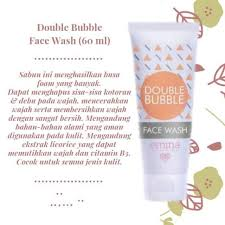

Moisturizer: 1. Y.O.U Radiance Up! Deep Moisturizing Cream


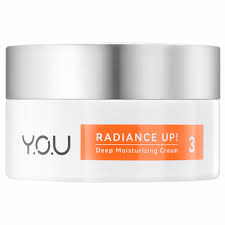

Sunscreen: 1. Azarine Hydrasoothe Sunscreen Gel SPF 45 PA++++


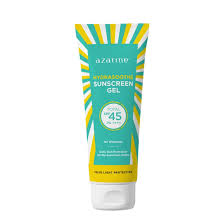


Face Wash: 2. Wardah Lightening Gentle Wash


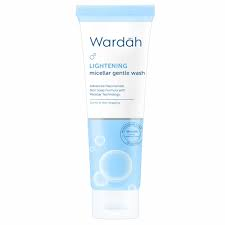

Moisturizer: 2. Wardah Hydra Rose Dewy Aqua Day Gel 


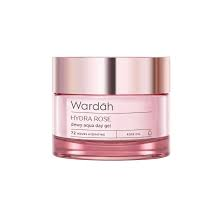

Sunscreen: 2. Avoskin The Great Shield SPF 50 PA++++


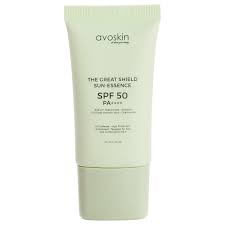


Face Wash: 3. Sensatia Botanicals Tea Tree & Lemon Facial Cleanser


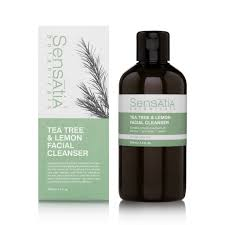

Moisturizer: 3. Somethinc Ceramic Skin Saviour 


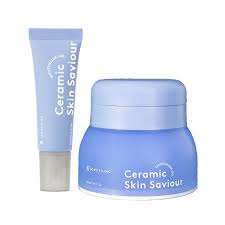

Sunscreen: 3. Y.O.U Triple UV Elixir SPF 50+ PA++++


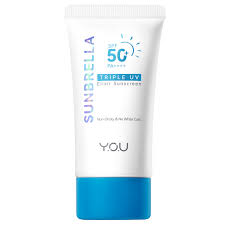

In [ ]:
upload_button.observe(on_upload_change, names='value')
display(upload_button)